PROYECTO GRUPO 6:
INTEGRANTES:  
    *   Arreaga Ingrid
    *   Bolaños Ana
    *   Buestan Nancy
    *   Valverde Soraya
    *   Zuñiga Luis

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
from google.colab import files

In [169]:
#Lectura de los archivos .csv
#Hace 12 meses, y y > 15 dias vencidos

In [170]:
infoTC_df= pd.read_csv(f'informacion_adicional_tarjetas.csv')


In [171]:
compTC_df= pd.read_csv(f'comportamiento_tarjetasvisa.csv')

#1.	Crear una definición de ‘mal_pagador’. Esta definición deberá contar con un componente temporal y un componente en días

In [246]:
compTC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   ID_CLIENTE          1048575 non-null  int64   
 1   MESES               1048575 non-null  int64   
 2   DIAS_VENCIDOS       839345 non-null   float64 
 3   DIAS_VENCIDOS_1     1048575 non-null  int64   
 4   definicion_cliente  839345 non-null   category
dtypes: category(1), float64(1), int64(3)
memory usage: 33.0 MB


In [247]:
compTC_df.value_counts()

ID_CLIENTE  MESES  DIAS_VENCIDOS  DIAS_VENCIDOS_1  definicion_cliente
5001711     -3     16.0           16               0                     1
5095353     -21    0.0            0                0                     1
            -31    0.0            0                0                     1
            -30    0.0            0                0                     1
            -29    0.0            0                0                     1
                                                                        ..
5038709      0     1.0            1                0                     1
5038710     -44    13.0           13               0                     1
            -43    11.0           11               0                     1
            -42    20.0           20               0                     1
5150487      0     0.0            0                0                     1
Name: count, Length: 839345, dtype: int64

In [174]:
# Reemplazar valores nulos con 0 y convertir la columna de float a int
compTC_df['DIAS_VENCIDOS_1'] = compTC_df['DIAS_VENCIDOS'].fillna(0).astype(int)

In [175]:
compTC_df.head()

,ID_CLIENTE,MESES,DIAS_VENCIDOS,DIAS_VENCIDOS_1
0,5001711,0,NaN,0
1,5001711,-1,11.0,11
2,5001711,-2,16.0,16
3,5001711,-3,16.0,16
4,5001712,0,0.0,0


In [245]:
compTC_df.to_csv('compTC_df.csv')

In [176]:
df = (compTC_df['MESES'] <= 12) & (compTC_df['DIAS_VENCIDOS_1'] > 15)

In [177]:
df

0          False
1          False
2           True
3           True
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1048575, dtype: bool

In [178]:
# Filtrar filas con valores nulos
filas_con_nulos = compTC_df[compTC_df.isnull().any(axis=1)]
print("\nFilas con valores nulos:")
print(filas_con_nulos)


Filas con valores nulos:
         ID_CLIENTE  MESES  DIAS_VENCIDOS  DIAS_VENCIDOS_1
0           5001711      0            NaN                0
23          5001713      0            NaN                0
24          5001713     -1            NaN                0
25          5001713     -2            NaN                0
26          5001713     -3            NaN                0
...             ...    ...            ...              ...
1048525     5150483    -13            NaN                0
1048526     5150483    -14            NaN                0
1048527     5150483    -15            NaN                0
1048528     5150483    -16            NaN                0
1048529     5150483    -17            NaN                0

[209230 rows x 4 columns]


In [179]:
bin_grupos = [0,100,300]

In [180]:
compTC_df["definicion_cliente"] = pd.cut(compTC_df['DIAS_VENCIDOS'], bins = bin_grupos, right= False, labels=[0,1])

#todod los clientes
#Eliminar todos los nulos 30% puede ser
#mes cero es cero

In [181]:
resultado = compTC_df[['ID_CLIENTE', 'MESES','DIAS_VENCIDOS_1']].groupby(['ID_CLIENTE','MESES']).sum()
resultado

DIAS_VENCIDOS_1
ID_CLIENTE MESES                 
5001711    -3                  16
           -2                  16
           -1                  11
            0                   0
5001712    -18                 17
...                           ...
5150487    -4                   0
           -3                   0
           -2                   0
           -1                   0
            0                   0

[1048575 rows x 1 columns]

In [182]:
# Agrupar por cliente y calcular el promedio de días vencidos 39279 registros
promedio_dias_vencidos = compTC_df.groupby('ID_CLIENTE')['DIAS_VENCIDOS_1'].max().reset_index(name='promedio_dias_vencidos')
promedio_dias_vencidos

,ID_CLIENTE,promedio_dias_vencidos
0,5001711,16
1,5001712,26
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,27
45981,5150483,0
45982,5150484,28
45983,5150485,26


In [183]:
#Filtra todos los clientes de los últimos 12 meses
df_ultimos_12_meses = compTC_df[compTC_df['MESES'] >= -12]
df_ultimos_12_meses

,ID_CLIENTE,MESES,DIAS_VENCIDOS,DIAS_VENCIDOS_1,definicion_cliente
0,5001711,0,NaN,0,NaN
1,5001711,-1,11.0,11,0
2,5001711,-2,16.0,16,0
3,5001711,-3,16.0,16,0
4,5001712,0,0.0,0,0
...,...,...,...,...,...
1048553,5150487,-8,0.0,0,0
1048554,5150487,-9,0.0,0,0
1048555,5150487,-10,0.0,0,0
1048556,5150487,-11,0.0,0,0


In [184]:
# Obtiene el promedio de los dias vencidos por cliente de los últimos 12 meses
promedio_dias_vencidos = df_ultimos_12_meses.groupby('ID_CLIENTE')['DIAS_VENCIDOS_1'].mean().reset_index(name='promedio_dias_vencidos')

#Redondea el promedio de los dias vencidos
promedio_dias_vencidos['promedio_dias_vencidos'] = promedio_dias_vencidos['promedio_dias_vencidos'].astype(int)

#Presente el dataframe
promedio_dias_vencidos

,ID_CLIENTE,promedio_dias_vencidos
0,5001711,10
1,5001712,4
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
39274,5150482,0
39275,5150483,0
39276,5150484,11
39277,5150485,16


In [185]:
# Filtrar clientes con promedio de días vencidos mayor a 15
clientes_con_promedio_alto = promedio_dias_vencidos[promedio_dias_vencidos['promedio_dias_vencidos'] > 15]
clientes_con_promedio_alto

,ID_CLIENTE,promedio_dias_vencidos
8,5001720,20
14,5001729,16
29,5001746,17
45,5001771,17
63,5001792,17
...,...,...
39259,5150429,16
39263,5150463,17
39265,5150465,16
39266,5150466,21


In [186]:
#Funcion que determina si el cliente es Buen y Mal Pagador
def definicion_cliente(row):
    if row['promedio_dias_vencidos'] >= 15:
        return 'Mal Pagador'
    else:
        return 'Buen Pagador'

In [187]:
#Se crea nueva columna 'definicion_cliente'
promedio_dias_vencidos['definicion_cliente'] = promedio_dias_vencidos.apply(definicion_cliente, axis=1)

In [188]:
# Se agrupa por la columna definicion_cliente
promedio_dias_vencidos.value_counts('definicion_cliente')

definicion_cliente
Buen Pagador    34616
Mal Pagador      4663
Name: count, dtype: int64

**3.	El dataset deberá constar de dos columnas CLIENTE_ID y  mal_pagador.**

In [189]:
# Nuevo dataframe cliente_df, creado con la columna 'ID_CLIENTE','definicion_cliente'
cliente_df = promedio_dias_vencidos[['ID_CLIENTE','definicion_cliente']]
cliente_df

,ID_CLIENTE,definicion_cliente
0,5001711,Buen Pagador
1,5001712,Buen Pagador
2,5001713,Buen Pagador
3,5001714,Buen Pagador
4,5001715,Buen Pagador
...,...,...
39274,5150482,Buen Pagador
39275,5150483,Buen Pagador
39276,5150484,Buen Pagador
39277,5150485,Mal Pagador


1.	Con el dataset que creó anteriormente, unifíquelo con el archivo de información adicional del cliente. Asegurese de que solo se encuentren los clientes que quiere analizar

In [190]:
#Se unifica el dataset cliente_df e infoTC
merged_df = pd.merge(cliente_df, infoTC_df, on='ID_CLIENTE', how='right')
merged_df

,ID_CLIENTE,definicion_cliente,GENERO,TIENE_CARRO,TIENE_PROPIEDADES,N_NINOS,INGRESO_ANUAL,CATEGORIA_INGRESO,NIVEL_EDUCACION,ESTADO_CIVIL,TIPO_CASA,DIAS_DESDE_NACIMIENTO,DIAS_TRABAJANDO,TIENE_CELULAR,TIENE_NUMEROTELEF_LABORAL,TIENE_NUMEROTELEF_PERSONAL,TIENE_EMAIL,PROFESION,N_MIEMBROSFAMILIA
0,5008804,Buen Pagador,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,Buen Pagador,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,Buen Pagador,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,Buen Pagador,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,NaN,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,NaN,M,0,1,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,NaN,F,0,0,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,NaN,F,0,0,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,NaN,F,0,1,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


#Data quality:
1.	Analice si existen valores duplicados, y si es así aborde el problema.


In [191]:
# Mostrar los duplicados en la columna 'ID_CLIENTE'
filas_duplicadas_id_cliente = merged_df[merged_df['ID_CLIENTE'].duplicated()]
filas_duplicadas_id_cliente

,ID_CLIENTE,definicion_cliente,GENERO,TIENE_CARRO,TIENE_PROPIEDADES,N_NINOS,INGRESO_ANUAL,CATEGORIA_INGRESO,NIVEL_EDUCACION,ESTADO_CIVIL,TIPO_CASA,DIAS_DESDE_NACIMIENTO,DIAS_TRABAJANDO,TIENE_CELULAR,TIENE_NUMEROTELEF_LABORAL,TIENE_NUMEROTELEF_PERSONAL,TIENE_EMAIL,PROFESION,N_MIEMBROSFAMILIA
421349,7602432,NaN,F,0,0,0,117000.0,Pensioner,Higher education,Married,House / apartment,-24708,365243,1,0,0,0,NaN,2.0
422660,7052783,NaN,M,1,1,2,166500.0,Working,Secondary / secondary special,Married,House / apartment,-15883,-2697,1,1,0,1,Managers,4.0
423702,7838075,NaN,F,1,1,0,315000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10698,-1659,1,0,0,1,NaN,1.0
424480,7053557,NaN,M,1,1,1,193500.0,Working,Secondary / secondary special,Married,House / apartment,-10439,-2250,1,1,0,0,Core staff,3.0
425306,7023651,NaN,F,0,0,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229,-1209,1,0,0,0,Accountants,1.0
425724,7213374,NaN,M,0,0,1,270000.0,Commercial associate,Higher education,Married,House / apartment,-14317,-1052,1,0,1,0,Managers,3.0
426198,7089090,NaN,F,0,1,1,189000.0,Commercial associate,Incomplete higher,Married,House / apartment,-10045,-1730,1,0,0,0,Core staff,3.0
426325,7576316,NaN,F,0,0,1,405000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-11994,-170,1,1,1,0,Sales staff,2.0
426488,7023108,NaN,F,0,0,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-17590,-1273,1,0,0,0,Cleaning staff,2.0
426665,7137299,NaN,F,0,1,0,292500.0,Working,Secondary / secondary special,Single / not married,Office apartment,-19679,-2074,1,0,0,0,Cleaning staff,1.0


In [192]:
#Muestra el número de registros duplicados
filas_duplicadas_id_cliente.shape[0]

47

In [193]:
merged_df.value_counts('ID_CLIENTE')

ID_CLIENTE
7618285    2
7744386    2
7154819    2
7636756    2
7024111    2
          ..
5785117    1
5785116    1
5785115    1
5785113    1
7999952    1
Name: count, Length: 438510, dtype: int64

2.	Analice si existen valores nulos, y si es así aborde el problema. Puede usar cualquiera de las alternativas que vimos en clase

In [194]:
#VALIDA SI TENEMOS DATOS NULOS EN EL DATAFRAME
merged_df.isnull().sum()

ID_CLIENTE                         0
definicion_cliente            408806
GENERO                             0
TIENE_CARRO                        0
TIENE_PROPIEDADES                  0
N_NINOS                            0
INGRESO_ANUAL                      0
CATEGORIA_INGRESO                  0
NIVEL_EDUCACION                    0
ESTADO_CIVIL                       0
TIPO_CASA                          0
DIAS_DESDE_NACIMIENTO              0
DIAS_TRABAJANDO                    0
TIENE_CELULAR                      0
TIENE_NUMEROTELEF_LABORAL          0
TIENE_NUMEROTELEF_PERSONAL         0
TIENE_EMAIL                        0
PROFESION                     134203
N_MIEMBROSFAMILIA                  0
dtype: int64

In [195]:
#Elimina los valores nulos que existen en la columna 'definicion_cliente'
SinDuplicados_df = merged_df.dropna(subset=['definicion_cliente'])
SinDuplicados_df

,ID_CLIENTE,definicion_cliente,GENERO,TIENE_CARRO,TIENE_PROPIEDADES,N_NINOS,INGRESO_ANUAL,CATEGORIA_INGRESO,NIVEL_EDUCACION,ESTADO_CIVIL,TIPO_CASA,DIAS_DESDE_NACIMIENTO,DIAS_TRABAJANDO,TIENE_CELULAR,TIENE_NUMEROTELEF_LABORAL,TIENE_NUMEROTELEF_PERSONAL,TIENE_EMAIL,PROFESION,N_MIEMBROSFAMILIA
0,5008804,Buen Pagador,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,Buen Pagador,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,Buen Pagador,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,Buen Pagador,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,Buen Pagador,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,Mal Pagador,M,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0
434809,5149834,Mal Pagador,F,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0
434810,5149838,Buen Pagador,F,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0
434811,5150049,Mal Pagador,F,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0


#Feature transformation:
1.	En este apartado usted deberá crear nuevas columnas apartir de las que tiene. Pueden ser:

a.	Variables indicadores (1 si cumple x condición, 0 caso contrario)
b.	Variables categóricas apartir de una variable nominal


**VARIABLES NOMINAL:**
  ID_CLIENTE
  GENERO  
  definicion_cliente
  TIENE_CARRO
  TIENE_PROPIEDADES
  CATEGORIA_INGRESO
  TIPO_CASA

**VARIABLE CUALITATIVA NOMINAL:**
  TIENE_CARRO
  TIENE_PROPIEDADES
  ESTADO_CIVIL
  TIENE_CELULAR
  TIENE_NUMEROTELEF_LABORAL
  TIENE_NUMEROTELEF_PERSONAL
  TIENE_EMAIL
  PROFESION

**VARIABLE CUANTITAIVA:**
  INGRESO_ANUAL
  Edad
  ANIOS_TRABAJANDO

**VARIABLE ORDINAL:**
  N_NINOS
  INGRESO_ANUAL
  NIVEL_EDUCACION
  N_MIEMBROSFAMILIA

**VARIABLES INDICADOR:**
    Ingreso_Alto  



In [196]:
#===========================================
#Creando la variable : Edad
#===========================================
SinDuplicados_df['Edad'] = (SinDuplicados_df['DIAS_DESDE_NACIMIENTO']/-360).astype('int')
SinDuplicados_df

<ipython-input-196-52bb699f2aae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SinDuplicados_df['Edad'] = (SinDuplicados_df['DIAS_DESDE_NACIMIENTO']/-360).astype('int')


,ID_CLIENTE,definicion_cliente,GENERO,TIENE_CARRO,TIENE_PROPIEDADES,N_NINOS,INGRESO_ANUAL,CATEGORIA_INGRESO,NIVEL_EDUCACION,ESTADO_CIVIL,TIPO_CASA,DIAS_DESDE_NACIMIENTO,DIAS_TRABAJANDO,TIENE_CELULAR,TIENE_NUMEROTELEF_LABORAL,TIENE_NUMEROTELEF_PERSONAL,TIENE_EMAIL,PROFESION,N_MIEMBROSFAMILIA,Edad
0,5008804,Buen Pagador,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,33
1,5008805,Buen Pagador,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,33
2,5008806,Buen Pagador,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,59
3,5008808,Buen Pagador,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,53
5,5008810,Buen Pagador,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,Mal Pagador,M,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,48
434809,5149834,Mal Pagador,F,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,34
434810,5149838,Buen Pagador,F,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,34
434811,5150049,Mal Pagador,F,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,49


In [197]:
SinDuplicados_df['Edad'].value_counts()

Edad
39    956
40    927
28    909
41    909
37    865
34    847
42    837
33    835
30    829
29    826
35    823
38    821
44    814
43    785
32    777
36    774
31    739
52    731
27    723
45    723
51    719
47    708
55    703
49    698
57    691
48    677
60    653
54    641
46    610
61    610
58    605
59    583
50    581
53    571
56    542
63    525
64    461
26    419
62    419
65    402
25    400
66    247
24    241
67    208
23    189
68     91
22     75
69     24
21      7
20      1
Name: count, dtype: int64

In [198]:
df.shape[0]

1048575

In [199]:
bin_grupos = [20, 28, 35, 42, 49, 56, 63, 69]

In [200]:
SinDuplicados_df["rango_edad"] = pd.cut(SinDuplicados_df['Edad'], bins=bin_grupos, right=False, labels=['20-27', '28-34', '35-41', '42-48', '49-55', '56-62','63-69'], ordered=True)

<ipython-input-200-de2a4a888d49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SinDuplicados_df["rango_edad"] = pd.cut(SinDuplicados_df['Edad'], bins=bin_grupos, right=False, labels=['20-27', '28-34', '35-41', '42-48', '49-55', '56-62','63-69'], ordered=True)


In [201]:
SinDuplicados_df["rango_edad"].value_counts().sort_index()

rango_edad
20-27    2055
28-34    5762
35-41    6075
42-48    5154
49-55    4644
56-62    4103
63-69    1934
Name: count, dtype: int64

In [202]:
SinDuplicados_df["rango_edad"].value_counts().sum()

29727

In [203]:
#Agrupando por la columna 'DIAS_TRABAJANDO'
SinDuplicados_df['DIAS_TRABAJANDO'].value_counts()

DIAS_TRABAJANDO
 365243    4956
-401         64
-200         53
-1678        52
-1539        51
           ... 
-2960         1
-5790         1
-4664         1
-10452        1
-11272        1
Name: count, Length: 3548, dtype: int64

In [204]:
#Filtrar los clientes donde la 'CATEGORIA_INGRESO' sea igual a 'Pensioner'
Pensionado_df = SinDuplicados_df[SinDuplicados_df['CATEGORIA_INGRESO'] =='Pensioner']
Pensionado_df

,ID_CLIENTE,definicion_cliente,GENERO,TIENE_CARRO,TIENE_PROPIEDADES,N_NINOS,INGRESO_ANUAL,CATEGORIA_INGRESO,NIVEL_EDUCACION,ESTADO_CIVIL,...,DIAS_DESDE_NACIMIENTO,DIAS_TRABAJANDO,TIENE_CELULAR,TIENE_NUMEROTELEF_LABORAL,TIENE_NUMEROTELEF_PERSONAL,TIENE_EMAIL,PROFESION,N_MIEMBROSFAMILIA,Edad,rango_edad
7,5008812,Buen Pagador,F,0,1,0,283500.0,Pensioner,Higher education,Separated,...,-22464,365243,1,0,0,0,NaN,1.0,62,56-62
8,5008813,Buen Pagador,F,0,1,0,283500.0,Pensioner,Higher education,Separated,...,-22464,365243,1,0,0,0,NaN,1.0,62,56-62
9,5008814,Buen Pagador,F,0,1,0,283500.0,Pensioner,Higher education,Separated,...,-22464,365243,1,0,0,0,NaN,1.0,62,56-62
76,5008884,Buen Pagador,F,0,1,0,315000.0,Pensioner,Secondary / secondary special,Widow,...,-20186,365243,1,0,0,0,NaN,1.0,56,56-62
162,5008976,Mal Pagador,F,0,1,0,112500.0,Pensioner,Secondary / secondary special,Married,...,-22319,365243,1,0,0,0,NaN,2.0,61,56-62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434788,5145690,Mal Pagador,F,0,1,0,306000.0,Pensioner,Higher education,Married,...,-21590,365243,1,0,0,0,NaN,2.0,59,56-62
434790,5145817,Buen Pagador,F,0,1,0,90000.0,Pensioner,Secondary / secondary special,Married,...,-22011,365243,1,0,0,0,NaN,2.0,61,56-62
434795,5148602,Mal Pagador,M,0,1,0,225000.0,Pensioner,Secondary / secondary special,Married,...,-22946,365243,1,0,0,0,NaN,2.0,63,63-69
434797,5148694,Mal Pagador,F,0,0,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,...,-20600,-198,1,0,0,0,Laborers,2.0,57,56-62


In [205]:
# Filtrar los registros donde los 'DIAS_TRABAJANDO' sean diferente de 365243
InfoCliente_df = SinDuplicados_df[SinDuplicados_df['DIAS_TRABAJANDO'] != 365243]
InfoCliente_df


,ID_CLIENTE,definicion_cliente,GENERO,TIENE_CARRO,TIENE_PROPIEDADES,N_NINOS,INGRESO_ANUAL,CATEGORIA_INGRESO,NIVEL_EDUCACION,ESTADO_CIVIL,...,DIAS_DESDE_NACIMIENTO,DIAS_TRABAJANDO,TIENE_CELULAR,TIENE_NUMEROTELEF_LABORAL,TIENE_NUMEROTELEF_PERSONAL,TIENE_EMAIL,PROFESION,N_MIEMBROSFAMILIA,Edad,rango_edad
0,5008804,Buen Pagador,M,1,1,0,427500.0,Working,Higher education,Civil marriage,...,-12005,-4542,1,1,0,0,NaN,2.0,33,28-34
1,5008805,Buen Pagador,M,1,1,0,427500.0,Working,Higher education,Civil marriage,...,-12005,-4542,1,1,0,0,NaN,2.0,33,28-34
2,5008806,Buen Pagador,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,...,-21474,-1134,1,0,0,0,Security staff,2.0,59,56-62
3,5008808,Buen Pagador,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-19110,-3051,1,0,1,1,Sales staff,1.0,53,49-55
5,5008810,Buen Pagador,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-19110,-3051,1,0,1,1,Sales staff,1.0,53,49-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,Mal Pagador,M,1,1,0,315000.0,Working,Secondary / secondary special,Married,...,-17348,-2420,1,0,0,0,Managers,2.0,48,42-48
434809,5149834,Mal Pagador,F,0,1,0,157500.0,Commercial associate,Higher education,Married,...,-12387,-1325,1,0,1,1,Medicine staff,2.0,34,28-34
434810,5149838,Buen Pagador,F,0,1,0,157500.0,Pensioner,Higher education,Married,...,-12387,-1325,1,0,1,1,Medicine staff,2.0,34,28-34
434811,5150049,Mal Pagador,F,0,1,0,283500.0,Working,Secondary / secondary special,Married,...,-17958,-655,1,0,0,0,Sales staff,2.0,49,49-55


In [206]:
InfoCliente_df['DIAS_TRABAJANDO'].value_counts()

DIAS_TRABAJANDO
-401      64
-200      53
-1678     52
-1539     51
-2087     51
          ..
-2960      1
-5790      1
-4664      1
-10452     1
-11272     1
Name: count, Length: 3547, dtype: int64

In [207]:
#Creando variable ANIOS_TRABAJANDO
InfoCliente_df['ANIOS_TRABAJANDO'] = (SinDuplicados_df['DIAS_TRABAJANDO']/-360).astype('int')
InfoCliente_df

<ipython-input-207-fd1e8539f62b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  InfoCliente_df['ANIOS_TRABAJANDO'] = (SinDuplicados_df['DIAS_TRABAJANDO']/-360).astype('int')


,ID_CLIENTE,definicion_cliente,GENERO,TIENE_CARRO,TIENE_PROPIEDADES,N_NINOS,INGRESO_ANUAL,CATEGORIA_INGRESO,NIVEL_EDUCACION,ESTADO_CIVIL,...,DIAS_TRABAJANDO,TIENE_CELULAR,TIENE_NUMEROTELEF_LABORAL,TIENE_NUMEROTELEF_PERSONAL,TIENE_EMAIL,PROFESION,N_MIEMBROSFAMILIA,Edad,rango_edad,ANIOS_TRABAJANDO
0,5008804,Buen Pagador,M,1,1,0,427500.0,Working,Higher education,Civil marriage,...,-4542,1,1,0,0,NaN,2.0,33,28-34,12
1,5008805,Buen Pagador,M,1,1,0,427500.0,Working,Higher education,Civil marriage,...,-4542,1,1,0,0,NaN,2.0,33,28-34,12
2,5008806,Buen Pagador,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,...,-1134,1,0,0,0,Security staff,2.0,59,56-62,3
3,5008808,Buen Pagador,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-3051,1,0,1,1,Sales staff,1.0,53,49-55,8
5,5008810,Buen Pagador,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-3051,1,0,1,1,Sales staff,1.0,53,49-55,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,Mal Pagador,M,1,1,0,315000.0,Working,Secondary / secondary special,Married,...,-2420,1,0,0,0,Managers,2.0,48,42-48,6
434809,5149834,Mal Pagador,F,0,1,0,157500.0,Commercial associate,Higher education,Married,...,-1325,1,0,1,1,Medicine staff,2.0,34,28-34,3
434810,5149838,Buen Pagador,F,0,1,0,157500.0,Pensioner,Higher education,Married,...,-1325,1,0,1,1,Medicine staff,2.0,34,28-34,3
434811,5150049,Mal Pagador,F,0,1,0,283500.0,Working,Secondary / secondary special,Married,...,-655,1,0,0,0,Sales staff,2.0,49,49-55,1


In [208]:
InfoCliente_df['ANIOS_TRABAJANDO'].value_counts()

ANIOS_TRABAJANDO
1     2650
3     2336
2     2291
4     2250
0     2100
6     1711
5     1708
7     1374
8     1356
9     1141
10     886
12     639
11     628
15     499
13     447
14     446
20     263
16     247
18     212
17     196
19     194
21     165
22     141
23     128
24     119
25      99
27      85
26      84
28      72
29      58
33      41
30      40
41      33
34      30
32      29
31      25
35      25
36      14
40      12
38       8
37       6
43       4
39       2
42       1
Name: count, dtype: int64

In [209]:
InfoCliente_df['INGRESO_ANUAL'].describe()['50%']

180000.0

In [210]:
#================================================================================================================
# Crear una variable INDICADOR: "Ingreso_Alto" para determinar si cliente percibe un ingreso anual mayor a 300000
#================================================================================================================
InfoCliente_df['Ingreso_Alto'] = InfoCliente_df['INGRESO_ANUAL'].apply(lambda x: 1 if x > 180000 else 0)
InfoCliente_df

<ipython-input-210-7a266e639a86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  InfoCliente_df['Ingreso_Alto'] = InfoCliente_df['INGRESO_ANUAL'].apply(lambda x: 1 if x > 180000 else 0)


,ID_CLIENTE,definicion_cliente,GENERO,TIENE_CARRO,TIENE_PROPIEDADES,N_NINOS,INGRESO_ANUAL,CATEGORIA_INGRESO,NIVEL_EDUCACION,ESTADO_CIVIL,...,TIENE_CELULAR,TIENE_NUMEROTELEF_LABORAL,TIENE_NUMEROTELEF_PERSONAL,TIENE_EMAIL,PROFESION,N_MIEMBROSFAMILIA,Edad,rango_edad,ANIOS_TRABAJANDO,Ingreso_Alto
0,5008804,Buen Pagador,M,1,1,0,427500.0,Working,Higher education,Civil marriage,...,1,1,0,0,NaN,2.0,33,28-34,12,1
1,5008805,Buen Pagador,M,1,1,0,427500.0,Working,Higher education,Civil marriage,...,1,1,0,0,NaN,2.0,33,28-34,12,1
2,5008806,Buen Pagador,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,...,1,0,0,0,Security staff,2.0,59,56-62,3,0
3,5008808,Buen Pagador,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,1,0,1,1,Sales staff,1.0,53,49-55,8,1
5,5008810,Buen Pagador,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,1,0,1,1,Sales staff,1.0,53,49-55,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,Mal Pagador,M,1,1,0,315000.0,Working,Secondary / secondary special,Married,...,1,0,0,0,Managers,2.0,48,42-48,6,1
434809,5149834,Mal Pagador,F,0,1,0,157500.0,Commercial associate,Higher education,Married,...,1,0,1,1,Medicine staff,2.0,34,28-34,3,0
434810,5149838,Buen Pagador,F,0,1,0,157500.0,Pensioner,Higher education,Married,...,1,0,1,1,Medicine staff,2.0,34,28-34,3,0
434811,5150049,Mal Pagador,F,0,1,0,283500.0,Working,Secondary / secondary special,Married,...,1,0,0,0,Sales staff,2.0,49,49-55,1,1


#Analisis correlacional:
1.	Identifique si tiene variables correlacionadas
2.	En caso de ser así, encuentre una explicación lógica para esa correlación. Si no encuentra un argumento, puede mencionarlo.


In [211]:
#================================================================================================================
# GRAFICO Nro. 1: CORRELACION DE PEARSON
# Correlación de Pearson entre variable Edad y INGRESO_ANUAL
#================================================================================================================

In [212]:
#Creacion Variable categ_cliente, SI definicion_cliente es igual a 'Buen Pagador' entonces 1 caso contrario 0
InfoCliente_df['categ_cliente'] = InfoCliente_df['definicion_cliente'].apply(lambda x: 1 if x == 'Buen Pagador' else 0)

<ipython-input-212-17b9645e8e11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  InfoCliente_df['categ_cliente'] = InfoCliente_df['definicion_cliente'].apply(lambda x: 1 if x == 'Buen Pagador' else 0)


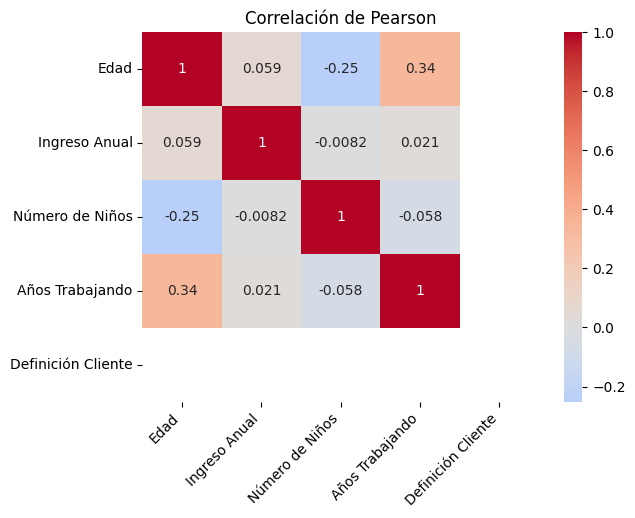

In [213]:
#correlation_matrix = InfoCliente_df.corr(numeric_only = True)
# Calcular la matriz de correlación
correlation_matrix = InfoCliente_df[['Edad','INGRESO_ANUAL','N_NINOS','ANIOS_TRABAJANDO','categ_cliente']].corr(method='pearson')

# Crear un mapa de calor para visualizar la correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',center=0)

# Cambiar las etiquetas de los ejes
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=['Edad', 'Ingreso Anual', 'Número de Niños', 'Años Trabajando','Definición Cliente'], rotation=45, ha='right')
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=['Edad', 'Ingreso Anual', 'Número de Niños', 'Años Trabajando','Definición Cliente'], rotation=0)

plt.title('Correlación de Pearson')

plt.show()


In [214]:
#================================================================================================================
# GRAFICO Nro. 2: CORRELACION DE SPEARMAN
# Correlación de Spearman entre variable Edad, INGRESO_ANUAL, 'N_NINOS','ANIOS_TRABAJANDO'
#================================================================================================================

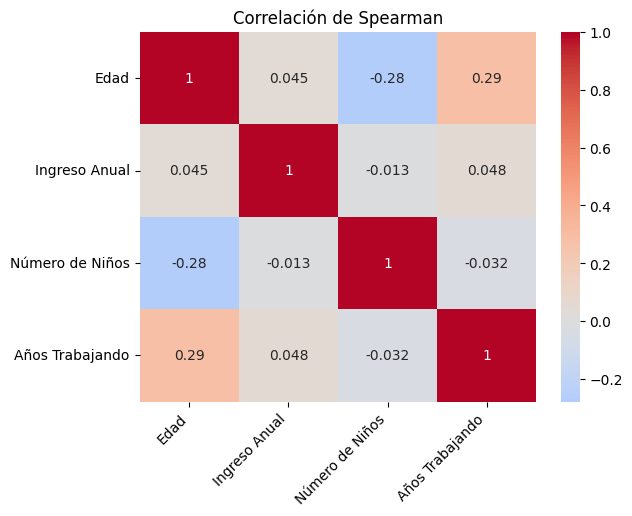

In [215]:
# Calcular la matriz de correlación
correlation_matrix = InfoCliente_df[['Edad','INGRESO_ANUAL','N_NINOS','ANIOS_TRABAJANDO']].corr(method='spearman')

# Crear un mapa de calor para visualizar la correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',center=0)

# Cambiar las etiquetas de los ejes
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=['Edad', 'Ingreso Anual', 'Número de Niños', 'Años Trabajando'], rotation=45, ha='right')
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=['Edad', 'Ingreso Anual', 'Número de Niños', 'Años Trabajando'], rotation=0)

plt.title('Correlación de Spearman')

plt.show()


No existe correlación entre las variables.
Correlación: 0.058

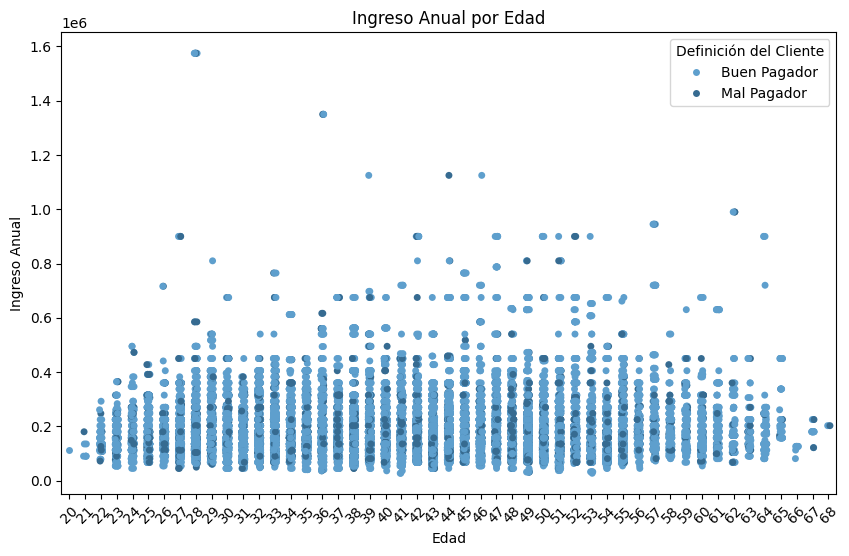

In [216]:
# Crear el gráfico de dispersión entre Edad e Ingreso Anual
plt.figure(figsize=(10, 6))
sns.stripplot(data=InfoCliente_df, x='Edad', y='INGRESO_ANUAL', jitter=True, palette='Blues_d',hue='definicion_cliente')

# Añadir etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual')
plt.title('Ingreso Anual por Edad')

# Personalizar la leyenda
plt.legend(title='Definición del Cliente', loc='best')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.show()

<ipython-input-217-89d031959f54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=InfoCliente_df, x='definicion_cliente', y='INGRESO_ANUAL', jitter=True, palette='Blues_d')


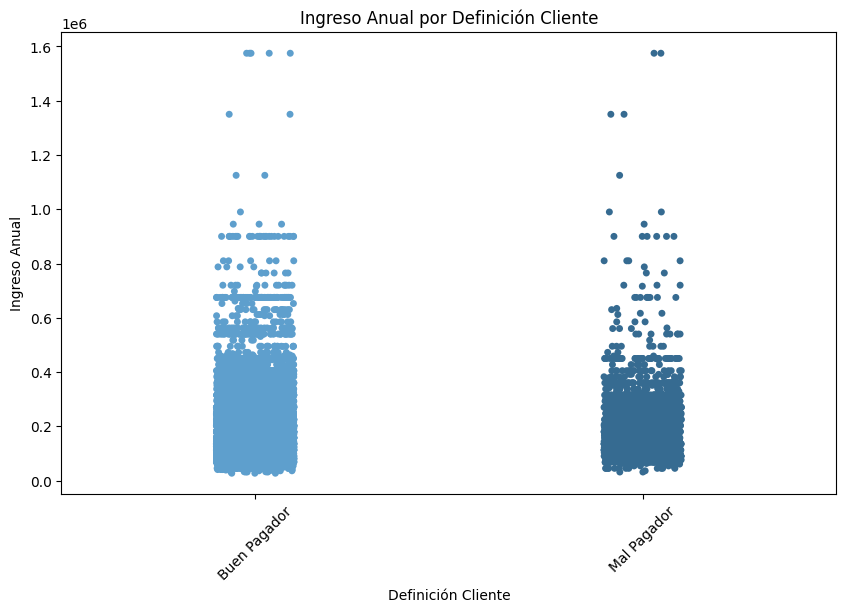

In [217]:
# Crear el gráfico de dispersión entre Definición Cliente e Ingreso Anual
plt.figure(figsize=(10, 6))
sns.stripplot(data=InfoCliente_df, x='definicion_cliente', y='INGRESO_ANUAL', jitter=True, palette='Blues_d')

# Añadir etiquetas y título
plt.xlabel('Definición Cliente')
plt.ylabel('Ingreso Anual')
plt.title('Ingreso Anual por Definición Cliente')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.show()

#Análisis descriptivo:
1.	Usando estatísticos descriptivos univariados, analice las variables que considere relevantes y aportan información.
2.	Usando estatísticos descriptivos bivariados, analice las variables que considere relevantes y aportan información.
3.	 Con variables categóricas, realice análisis con tablas cruzadas.


In [218]:
#================================================================================================================
# GRÁFICO Nro. 1: Univariado
# DESCRIPCIÓN: Segmentando por la variable Rango de Edad
#================================================================================================================

In [219]:
bin_grupos = [20, 28, 35, 42, 49, 56, 63, 69]
labels=['20-27', '28-34', '35-41', '42-48', '49-55', '56-62','63-69']
InfoCliente_df["rango_edad"] = pd.cut(InfoCliente_df['Edad'], bins=bin_grupos, right=False, labels=labels, ordered=True)
#InfoCliente_df['rango_edad'].value_counts().sort_index().reset_index()

<ipython-input-219-f651ae0a7adb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  InfoCliente_df["rango_edad"] = pd.cut(InfoCliente_df['Edad'], bins=bin_grupos, right=False, labels=labels, ordered=True)


In [220]:
df_group = InfoCliente_df['rango_edad'].value_counts().sort_index().reset_index()
df_group

,rango_edad,count
0,20-27,2035
1,28-34,5750
2,35-41,6046
3,42-48,5058
4,49-55,4148
5,56-62,1513
6,63-69,245


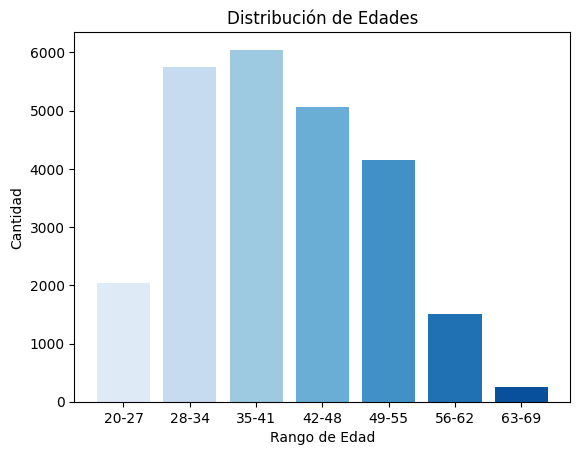

In [221]:
# Extraer los valores de rango de edad y sus respectivas cuentas
rango_edad = df_group['rango_edad'].astype(str)  # Convertir a string para evitar problemas de etiquetado
Cantidad = df_group['count']

# Definir contenedores y etiquetas
labels=['20-27', '28-34', '35-41', '42-48', '49-55', '56-62','63-69']

# Crear el histograma
plt.bar(rango_edad, Cantidad, color=sns.color_palette("Blues", len(labels)))

# Añadir etiquetas y título
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.title('Distribución de Edades')

# Mostrar el gráfico
plt.show()


In [222]:
#================================================================================================================
# GRÁFICO Nro. 2: Bivariados
# DESCRIPCIÓN: Ingreso Anual por Profesión (2 variables)
#================================================================================================================

In [223]:
InfoCliente_df["PROFESION"] = InfoCliente_df["PROFESION"].fillna("No especifica")

<ipython-input-223-4039c1e76851>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  InfoCliente_df["PROFESION"] = InfoCliente_df["PROFESION"].fillna("No especifica")


In [224]:
InfoCliente_df[["PROFESION","INGRESO_ANUAL"]]

,PROFESION,INGRESO_ANUAL
0,No especifica,427500.0
1,No especifica,427500.0
2,Security staff,112500.0
3,Sales staff,270000.0
5,Sales staff,270000.0
...,...,...
434808,Managers,315000.0
434809,Medicine staff,157500.0
434810,Medicine staff,157500.0
434811,Sales staff,283500.0


<ipython-input-225-7df4be45f8ce>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=InfoCliente_df, x='PROFESION', y='INGRESO_ANUAL', estimator=sum, ci=None, palette='Blues_d')
<ipython-input-225-7df4be45f8ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=InfoCliente_df, x='PROFESION', y='INGRESO_ANUAL', estimator=sum, ci=None, palette='Blues_d')


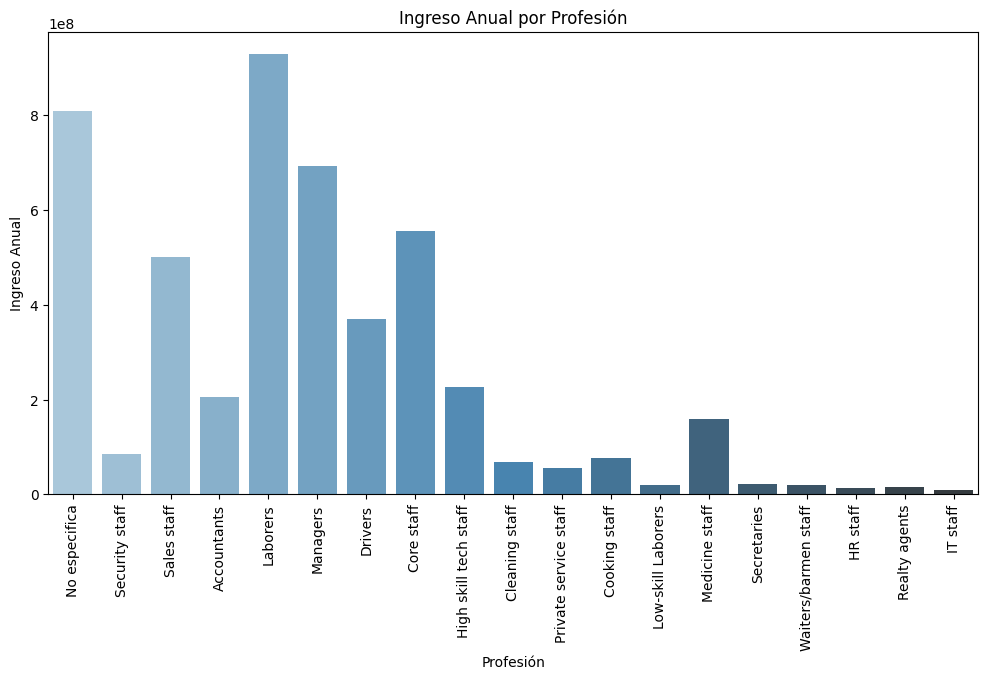

In [225]:
# Crear el barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=InfoCliente_df, x='PROFESION', y='INGRESO_ANUAL', estimator=sum, ci=None, palette='Blues_d')

# Añadir etiquetas y título
plt.xlabel('Profesión')
plt.ylabel('Ingreso Anual')
plt.title('Ingreso Anual por Profesión')

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario
plt.show()


In [226]:
#================================================================================================================
# GRAFICO Nro. 3: CROSSTAB (TABLA CRUZADA)
# DESCRIPCION: Los clientes más jóvenes, adultos o tercer edad son los más riesgosos?
#================================================================================================================

In [227]:
#CROSSTAB
bin = [20,34,64,100]

In [228]:
InfoCliente_df["Categoria_Edad"] = pd.cut(InfoCliente_df.Edad,bin,labels=["Joven","Adulto","Tercera Edad"])

<ipython-input-228-56ad6a0ed304>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  InfoCliente_df["Categoria_Edad"] = pd.cut(InfoCliente_df.Edad,bin,labels=["Joven","Adulto","Tercera Edad"])


In [229]:
crosstab_df = pd.crosstab(InfoCliente_df.Ingreso_Alto,InfoCliente_df.Categoria_Edad, normalize=True, margins=True, margins_name='Total')
crosstab_df

Categoria_Edad,Joven,Adulto,Tercera Edad,Total
Ingreso_Alto,,,,
0,0.197709,0.385053,0.001573,0.584335
1,0.116238,0.298016,0.001412,0.415665
Total,0.313947,0.683068,0.002985,1.000000


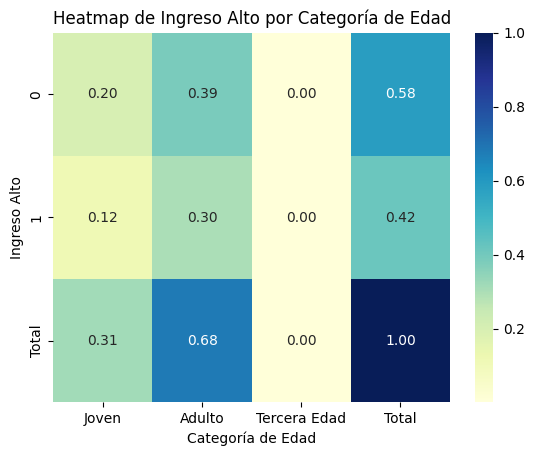

In [230]:
sns.heatmap(crosstab_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title('Heatmap de Ingreso Alto por Categoría de Edad')
plt.xlabel('Categoría de Edad')
plt.ylabel('Ingreso Alto')
plt.show()


In [231]:
#
#Tabla cruzada Categoria de Edad y Definicion Cliente
#
crosstab_df_1 = pd.crosstab(InfoCliente_df.Categoria_Edad,InfoCliente_df.definicion_cliente, normalize=True, margins=True, margins_name='Total')
crosstab_df_1

definicion_cliente,Buen Pagador,Mal Pagador,Total
Categoria_Edad,,,
Joven,0.273615,0.040332,0.313947
Adulto,0.599056,0.084012,0.683068
Tercera Edad,0.002702,0.000282,0.002985
Total,0.875373,0.124627,1.000000


In [232]:
#Tabla cruzada Rango de Edad y Definicion Cliente
crosstab_df_2 = pd.crosstab(InfoCliente_df.rango_edad,InfoCliente_df.definicion_cliente, normalize=True, margins=True, margins_name='Total')
crosstab_df_2

definicion_cliente,Buen Pagador,Mal Pagador,Total
rango_edad,,,
20-27,0.070135,0.011938,0.082073
28-34,0.203509,0.028393,0.231902
35-41,0.215205,0.028635,0.243839
42-48,0.177818,0.026175,0.203993
49-55,0.146078,0.021214,0.167292
56-62,0.053721,0.007300,0.061020
63-69,0.008913,0.000968,0.009881
Total,0.875378,0.124622,1.000000


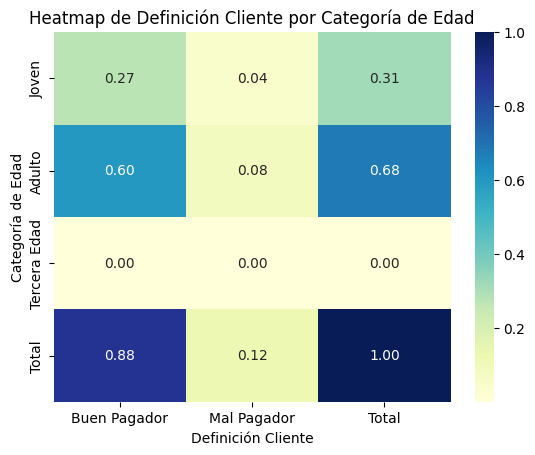

In [233]:
#definicion_cliente
sns.heatmap(crosstab_df_1, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title('Heatmap de Definición Cliente por Categoría de Edad')
plt.xlabel('Definición Cliente')
plt.ylabel('Categoría de Edad')
plt.show()


In [234]:
#Tabla cruzada Rango de Edad y Definicion Cliente
crosstab_df_3 = pd.crosstab(InfoCliente_df.NIVEL_EDUCACION,InfoCliente_df.definicion_cliente, normalize=True, margins=True, margins_name='Total')
crosstab_df_3

definicion_cliente,Buen Pagador,Mal Pagador,Total
NIVEL_EDUCACION,,,
Academic degree,0.001089,0.000081,0.001170
Higher education,0.256544,0.033797,0.290341
Incomplete higher,0.039806,0.005969,0.045775
Lower secondary,0.006534,0.000726,0.007260
Secondary / secondary special,0.571406,0.084049,0.655455
Total,0.875378,0.124622,1.000000


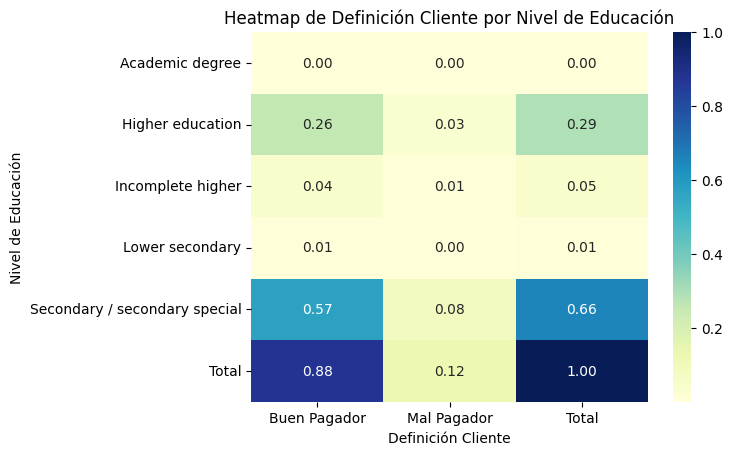

In [235]:
#definicion_cliente
sns.heatmap(crosstab_df_3, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title('Heatmap de Definición Cliente por Nivel de Educación')
plt.xlabel('Definición Cliente')
plt.ylabel('Nivel de Educación')
plt.show()

In [236]:
#================================================================================================================
# GRAFICO Nro. 4: PAIRS PLOT
# DESCRIPCION: Representación con barras
#================================================================================================================

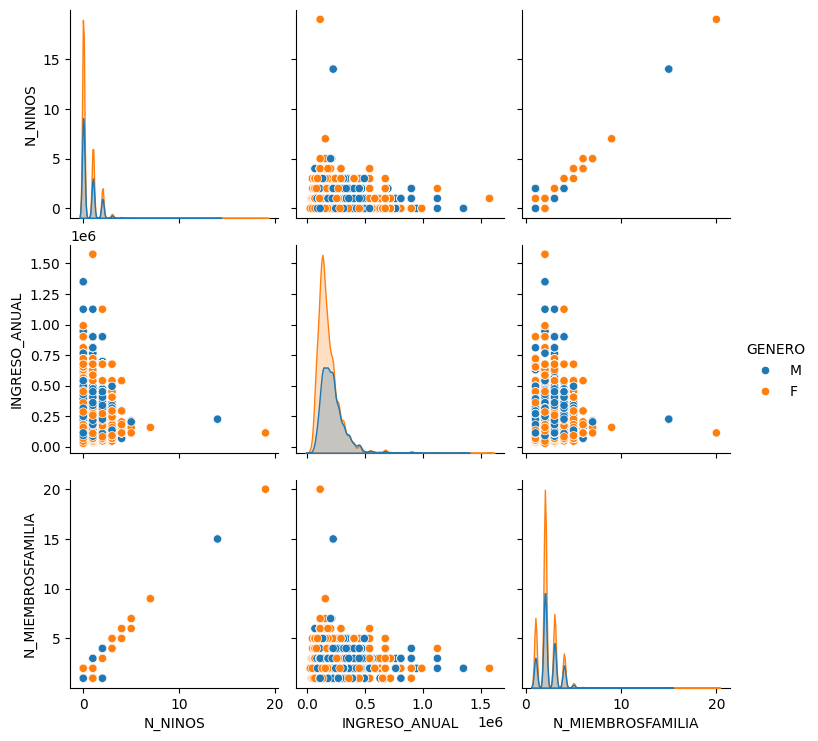

In [237]:
sns.pairplot(InfoCliente_df, vars = ["N_NINOS", "INGRESO_ANUAL","N_MIEMBROSFAMILIA"],hue = "GENERO")

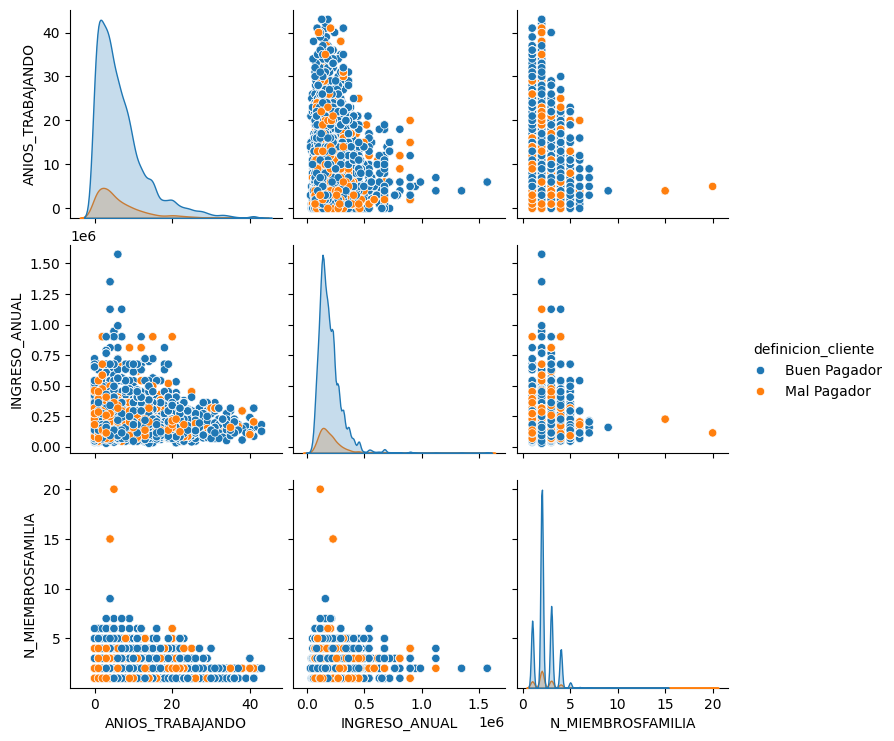

In [238]:
# variables continuas comparar OK
sns.pairplot(InfoCliente_df, vars = ["ANIOS_TRABAJANDO","INGRESO_ANUAL","N_MIEMBROSFAMILIA"],hue = "definicion_cliente" )

In [239]:
InfoCliente_df['INGRESO_ANUAL'].describe()

count    2.479500e+04
mean     1.948980e+05
std      1.049551e+05
min      2.700000e+04
25%      1.350000e+05
50%      1.800000e+05
75%      2.250000e+05
max      1.575000e+06
Name: INGRESO_ANUAL, dtype: float64

<Axes: xlabel='definicion_cliente', ylabel='INGRESO_ANUAL'>

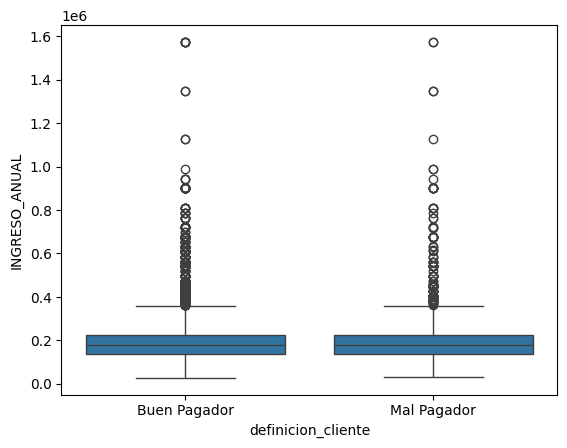

In [240]:
sns.boxplot(x='definicion_cliente', y='INGRESO_ANUAL', data=InfoCliente_df)

In [242]:
InfoCliente_df.to_csv('InfoCliente_df.csv')